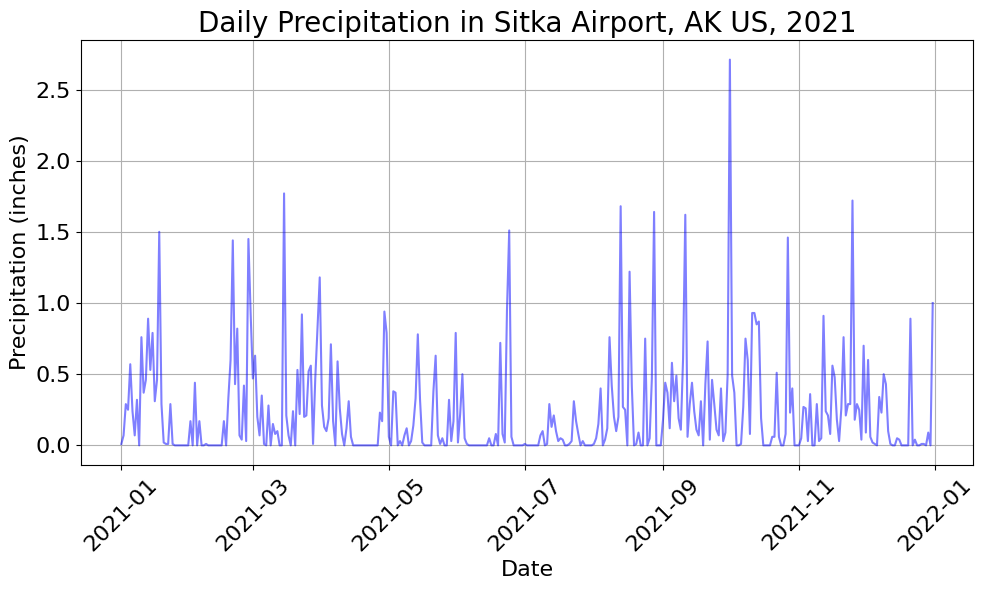

In [ ]:
from pathlib import Path
import csv
path = Path('sitka_weather_2021_full.csv')


with open(path) as csvfile:
    reader = csv.reader(csvfile)
    header_row = next(reader)
    prcp_index = header_row.index('PRCP')
    date_index = header_row.index('DATE')
    prcp = []
    dates = []
    for row in reader:
        prcp.append(float(row[prcp_index]))
        dates.append(row[date_index])
import matplotlib.pyplot as plt
from datetime import datetime

dates = [datetime.strptime(date, '%Y-%m-%d') for date in dates]
plt.figure(figsize=(10, 6))
plt.plot(dates, prcp, color='blue', alpha=0.5)
plt.title('Daily Precipitation in Sitka Airport, AK US, 2021', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Precipitation (inches)', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

# 格式转换

In [ ]:
from pathlib import Path
import json
import chardet
from pathlib import Path
import json

path = Path('eq_data_30_day_m1.geojson')
contents = path.read_text(encoding='utf-8')  # gbk编码遇到错误，指定编码为 utf-8
all_eq_data = json.loads(contents)

path = Path('readable_eq_data.geojson')
readable_contents = json.dumps(all_eq_data, indent=4)
path.write_text(readable_contents)


# 散点图绘制

In [ ]:
from pathlib import Path
import json
path = Path('readable_eq_data.geojson')
contents = path.read_text()
all_eq_data = json.loads(contents)
all_eq_dicts = all_eq_data['features']
mags, titles, lons, lats = [], [], [], []

import pandas as pd
for eq_dict in all_eq_dicts:
 mag = eq_dict['properties']['mag']
 title = eq_dict['properties']['title']
 lon = eq_dict['geometry']['coordinates'][0]
 lat = eq_dict['geometry']['coordinates'][1]
 mags.append(mag)
 titles.append(title)
 lons.append(lon)
 lats.append(lat)
 data = pd.DataFrame(
 data=zip(lons, lats, titles, mags), columns=['经度', 
'纬度', '位置', '震级']
 )
import plotly.express as px
fig = px.scatter(
    data_frame=data,
    x='经度',
    y='纬度',
    labels={'x': '经度', 'y': '纬度'},
    range_x=[-200, 200],
    range_y=[-90, 90],
    width=800,
    height=800,
    size='震级',
    size_max=10,
    color='震级',
    hover_name='位置',
    title='全球地震散点图',
)
fig.write_html('global_earthquakes.html')
fig.show()



In [25]:
import numpy as np
from IPython.display import display, Math, Latex


array = np.random.rand(6, 6)


u, sigma, vt = np.linalg.svd(array)


display(Latex(r'$U$ :'))
print(u)
display(Latex(r'$\sigma $ :'))
print(sigma)
display(Latex(r'$V^T$ :'))
print(vt)


print("\n原始数组:")
print(array)



sigma_matrix = np.zeros((u.shape[0], vt.shape[0]))
np.fill_diagonal(sigma_matrix, sigma)

reconstructed_array = u @ sigma_matrix @ vt
print("\n验证 SVD 分解结果 (重构后的数组):")
display(Latex(r'The result of $\ U\cdot \sigma\cdot V^T$ is:'))
print(reconstructed_array)


print("\n重构数组是否接近原始数组:", np.allclose(array, reconstructed_array))

<IPython.core.display.Latex object>

[[-0.16585257  0.82680475  0.19641719  0.06619086  0.47264152  0.15011952]
 [-0.34768812  0.34920037  0.13416278 -0.40594243 -0.75449704  0.07153589]
 [-0.4180127   0.07908049 -0.67834526 -0.2477179   0.19353894 -0.5099391 ]
 [-0.60077376 -0.15374794 -0.25025551  0.53109077 -0.07574335  0.51479139]
 [-0.30999433 -0.03089302  0.47304946  0.48468506 -0.1104266  -0.65731249]
 [-0.46887705 -0.40448296  0.44369441 -0.50248218  0.38981509  0.12344626]]


<IPython.core.display.Latex object>

[2.71980606 0.92773425 0.69863603 0.30810071 0.16396289 0.11363391]


<IPython.core.display.Latex object>

[[-0.30616982 -0.52232049 -0.53902108 -0.16804813 -0.42992807 -0.36030446]
 [ 0.57498023 -0.39675458 -0.07126543  0.69077404  0.03363322 -0.16912954]
 [-0.12716455  0.4861859   0.20913268  0.38109663 -0.70606304 -0.24485981]
 [ 0.55938028 -0.04290291 -0.09834255 -0.34589427 -0.5285088   0.52594429]
 [-0.28631995  0.21749185 -0.60619824  0.43414867  0.06276517  0.55750995]
 [-0.40571116 -0.53314822  0.53244106  0.20304802 -0.17956789  0.44066407]]

原始数组:
[[0.54399889 0.00488065 0.1772783  0.68801609 0.11386727 0.06064382]
 [0.4260422  0.38509157 0.59785734 0.40962464 0.4081519  0.1318092 ]
 [0.42226836 0.3753837  0.46589654 0.08953772 0.87860735 0.46528532]
 [0.51185111 0.7841447  0.87693821 0.05931619 0.72338291 0.76058212]
 [0.31865462 0.64190944 0.48214095 0.17315603 0.06152545 0.26323677]
 [0.02467111 0.97874741 0.76290735 0.15736867 0.40009464 0.40743513]]

验证 SVD 分解结果 (重构后的数组):


<IPython.core.display.Latex object>

[[0.54399889 0.00488065 0.1772783  0.68801609 0.11386727 0.06064382]
 [0.4260422  0.38509157 0.59785734 0.40962464 0.4081519  0.1318092 ]
 [0.42226836 0.3753837  0.46589654 0.08953772 0.87860735 0.46528532]
 [0.51185111 0.7841447  0.87693821 0.05931619 0.72338291 0.76058212]
 [0.31865462 0.64190944 0.48214095 0.17315603 0.06152545 0.26323677]
 [0.02467111 0.97874741 0.76290735 0.15736867 0.40009464 0.40743513]]

重构数组是否接近原始数组: True
